# Test CHESS fitting

In [1]:
import sys
sys.path.append('../src/nxs_analysis_tools/')
from datareduction import load_data, Scissors
from chess import *
from fitting import *

from lmfit.models import GaussianModel, LinearModel

In [2]:
sample = TempDependence()

In [3]:
sample.load_datasets(folder='../docs/source/examples/example_data/sample_name')

Found temperature folders:
[0] 15
[1] 100
[2] 300
-----------------------------------------------
Loading 15 K indexed .nxs files...
Found ..\docs\source\examples\example_data\sample_name\15\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 100 K indexed .nxs files...
Found ..\docs\source\examples\example_data\sample_name\100\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 300 K indexed .nxs files...
Found ..\docs\source\examples\example_data\sample_name\300\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


In [4]:
sample.cut_data(center=(0,0,0), window=(0.1,0.5,0.1))

-------------------------------
Cutting T = 15 K data...
Linecut axis: K
Integrated axes: ['H', 'L']
-------------------------------
Cutting T = 100 K data...
Linecut axis: K
Integrated axes: ['H', 'L']
-------------------------------
Cutting T = 300 K data...
Linecut axis: K
Integrated axes: ['H', 'L']


{'15': NXdata('data'), '100': NXdata('data'), '300': NXdata('data')}

In [5]:
sample.set_model_components([GaussianModel(prefix='peak'), LinearModel(prefix='background')])

In [6]:
sample.set_param_hint('peakcenter', min=-0.1, max=0.1)

In [7]:
sample.make_params()

In [8]:
sample.guess()

In [9]:
sample.print_initial_params()

peaksigma
	min: 0
peakfwhm
	expr: 2.3548200*peaksigma
peakheight
	expr: 0.3989423*peakamplitude/max(1e-15, peaksigma)
peakcenter
	min: -0.1
	max: 0.1
peaksigma
	min: 0
peakfwhm
	expr: 2.3548200*peaksigma
peakheight
	expr: 0.3989423*peakamplitude/max(1e-15, peaksigma)
peakcenter
	min: -0.1
	max: 0.1
peaksigma
	min: 0
peakfwhm
	expr: 2.3548200*peaksigma
peakheight
	expr: 0.3989423*peakamplitude/max(1e-15, peaksigma)
peakcenter
	min: -0.1
	max: 0.1


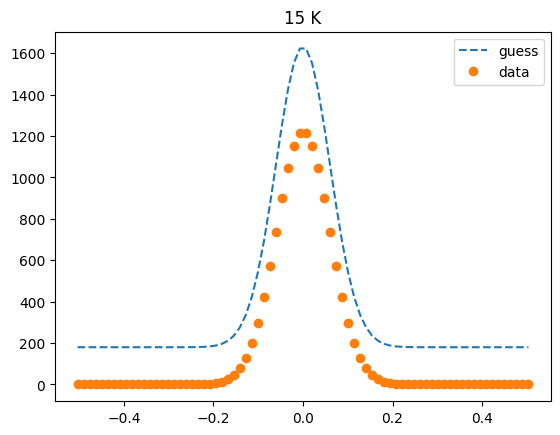

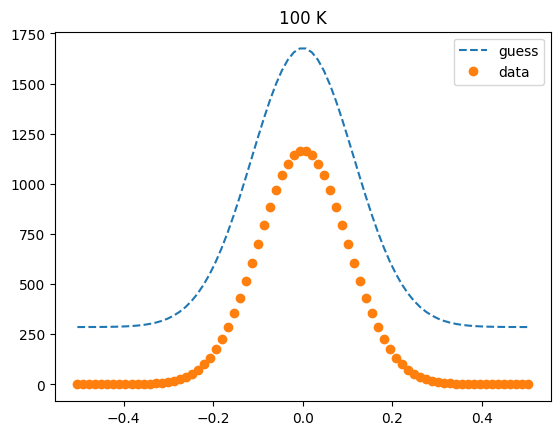

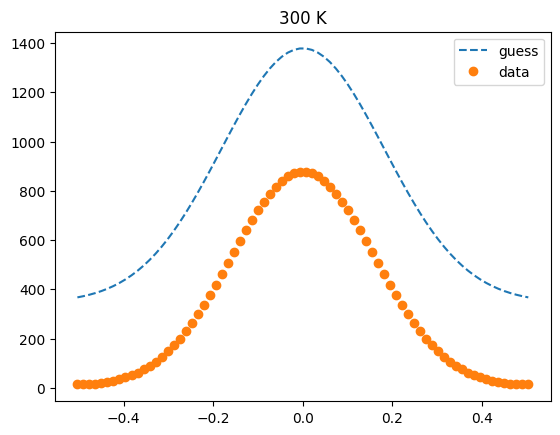

In [10]:
sample.plot_initial_guess()

In [11]:
sample.fit()

Fitting 15 K  data...
Done.
Fitting 100 K  data...
Done.
Fitting 300 K  data...
Done.
Fits completed.


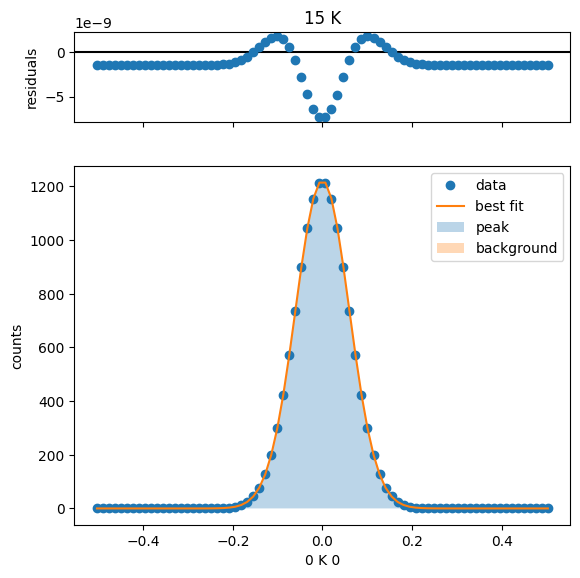

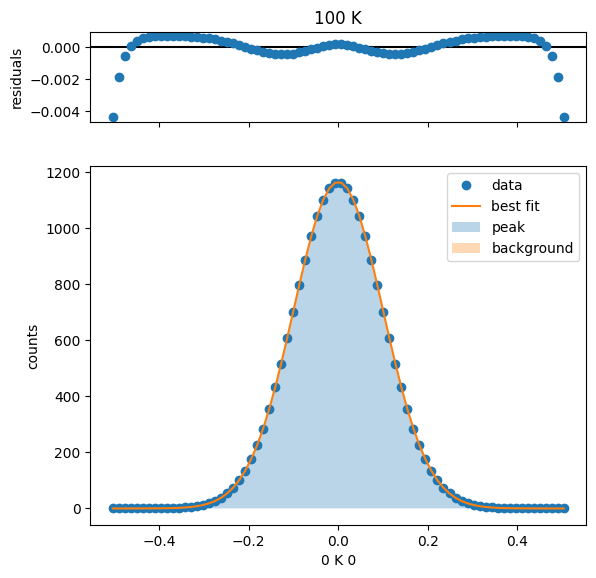

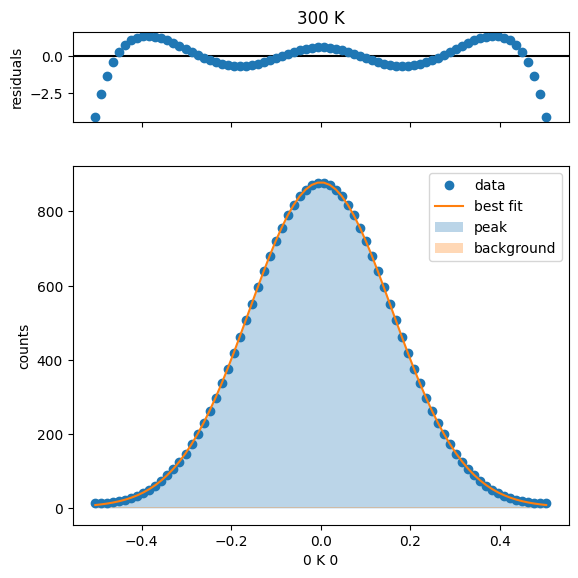

In [12]:
sample.plot_fit()

In [13]:
sample.print_fit_report()

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 76
    # variables        = 5
    chi-square         = 3.7857e-16
    reduced chi-square = 5.3320e-18
    Akaike info crit   = -3017.90553
    Bayesian info crit = -3006.25186
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    backgroundslope:      at initial value
[[Variables]]
    peakamplitude:        183.644087 (init = 219.8854)
    peakcenter:          -2.3217e-15 (init = 0)
    peaksigma:            0.06000000 (init = 0.06040268)
    backgroundslope:     -2.8067e-17 (init = 2.385307e-14)
    backgroundintercept: -1.5062e-09 (init = 180.0195)
    peakfwhm:             0.14128920 == '2.3548200*peaksigma'
    peakheight:           1221.05658 == '0.3989423*peakamplitude/max(1e-15, peaksigma)'
    peakcorrlength:       44.4703863 == '(2 * 3.141592653589793) / 